In [5]:
import os
#External deps
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc,logfbank

from project_constants import TRAINING_CSV_FILENAME,TRAINING_DIR
from project_constants import getPath, getFilesFromDir
from project_constants import OUTPATH as SORTED_SAMPLES


In [6]:
#FUNCTIONS
#Seth Adams audio classification youtube tutorial
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,
    sharey = True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,
    sharey = True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,
    sharey = True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
            cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,
    sharey = True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
            cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1




In [7]:
#Loading data
df = pd.read_csv(getPath(TRAINING_DIR,TRAINING_CSV_FILENAME))
df.set_index('path', inplace=True)

for f in df.index:
    try:
        rate,signal = wavfile.read(f)
        df.at[f,'length'] = signal.shape[0]/rate
    except:
        print(f"error at: {f}")
        df.at[f,'length'] = -1



/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate,signal = wavfile.read(f)


error at: ./outputs/kick/KSHMR_Signature_Kick_05_-_Secrets__E_.aif
error at: ./outputs/snare/KSHMR_Tight_Snare_06.aif
error at: ./outputs/snare/KSHMR_Tight_Snare_10.aif
error at: ./outputs/snare/KSHMR_Hard_Snare_10.aif
error at: ./outputs/perc/KSHMR_Low_Perc_06__E_.aif
error at: ./outputs/perc/KSHMR_Hi_Perc_14.aif
error at: ./outputs/perc/KSHMR_Hi_Perc_05.aif
error at: ./outputs/perc/KSHMR_Hi_Perc_10__G#_.aif
error at: ./outputs/clap/KSHMR_Claps_07_-_Tightest_Clap.aif


/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 47944 bytes, expected 47952 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 73412 bytes, expected 73420 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 653764 bytes, expected 653772 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 40436 bytes, expected 40444 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 13268 bytes, expected 

error at: ./outputs/clap/KSHMR_Claps_05_-_Snappy_Clap.aif


/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 29458 bytes, expected 29466 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 22628 bytes, expected 22636 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 74660 bytes, expected 74668 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 50120 bytes, expected 50128 bytes from header.
  rate,signal = wavfile.read(f)
/var/folders/pp/k3myc5r95_9dz0rtmw8fkc0h0000gn/T/ipykernel_1676/62816579.py:7: WavFileWarning: Reached EOF prematurely; finished at 18254 bytes, expected 18

error at: ./outputs/hat/open_hat/KSHMR_Hi_Hats_Open_03.aif
error at: ./outputs/hat/open_hat/KSHMR_Hi_Hats_Open_07.aif


label
clap          0.693790
closed_hat    0.356718
cymbal        3.510615
hat           0.740218
kick          0.583666
open_hat      1.229878
perc          1.541913
snare         0.637881
Name: length, dtype: float64


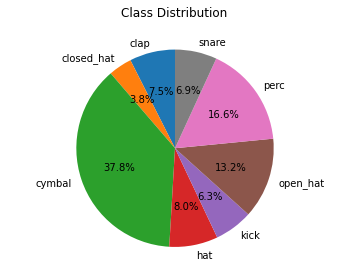

In [8]:
#df.head()

classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()
print(class_dist)

fig,ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
shadow = False, startangle=90) #autopct just means how many D.P
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)